<a href="https://colab.research.google.com/github/hargurjeet/Bike_Sharing_Case_Study/blob/main/Bike_Sharing_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
!pip install autoviz -- quiet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement quiet (from versions: none)
ERROR: No matching distribution found for quiet


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from autoviz.AutoViz_Class import AutoViz_Class


import matplotlib.pyplot as plt
%matplotlib inline
# import warnings
# warnings.filterswarnings('ignore')

In [113]:
file_path = r'https://raw.githubusercontent.com/hargurjeet/Bike_Sharing_Case_Study/main/day.csv'
br = pd.read_csv(file_path)
br.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [114]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No nul values hence imputing no required

In [115]:
br.shape

(730, 16)

In [116]:
br.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


High level flow

1. Read, understanding and visualising the data.
2. Preparing the dataset (train test split, scaling)
3. Training the model.
4. Resdiual analysis
5. Prediction and evaluation on the test set

## Understanding the data

In [117]:
## since instant holds the index values, let get rid of it
br = br.drop('instant', axis=1)

In [118]:
# Modifing the data as per the data dictornary
 
 # Modifing the season column
br.loc[(br['season'] == 1) , 'season'] = 'spring'

br.loc[(br['season'] == 2) , 'season'] = 'summer'

br.loc[(br['season'] == 3) , 'season'] = 'fall'

br.loc[(br['season'] == 4) , 'season'] = 'winter'

# Modifing the month column
br.mnth = br.mnth.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

#modifing the weekday column
br.weekday = br.weekday.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
br.loc[(br['weathersit'] == 1) , 'weathersit'] = 'Clear/Partly Cloudy'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
br.loc[(br['weathersit'] == 2) , 'weathersit'] = 'Mist'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
br.loc[(br['weathersit'] == 3) , 'weathersit'] = 'Light_snow/Light_rain'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
br.loc[(br['weathersit'] == 4) , 'weathersit'] = 'HeavyRain/Thunderstorm'

# Converting the columns to categories
br.season.astype('category')
br.yr.astype('category')
br.mnth.astype('category')
br.holiday.astype('category')
br.weekday.astype('category')
br.workingday.astype('category')
br.weathersit.astype('category')

0                     Mist
1                     Mist
2      Clear/Partly Cloudy
3      Clear/Partly Cloudy
4      Clear/Partly Cloudy
              ...         
725                   Mist
726                   Mist
727                   Mist
728    Clear/Partly Cloudy
729                   Mist
Name: weathersit, Length: 730, dtype: category
Categories (3, object): ['Clear/Partly Cloudy', 'Light_snow/Light_rain', 'Mist']

In [119]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 85.7+ KB


In [120]:
br.sample(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,28-12-2019,spring,1,Dec,0,Sun,1,Mist,10.386653,12.7523,59.0000,10.416557,644,2451,3095
388,24-01-2019,spring,1,Jan,0,Thurs,1,Clear/Partly Cloudy,14.042500,17.4554,83.5833,8.292389,439,3900,4339
208,28-07-2018,fall,0,Jul,0,Sat,1,Clear/Partly Cloudy,31.945847,36.9950,58.3333,11.958093,606,3784,4390


In [121]:
br.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Thurs,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Fri,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Performing EDA

In [122]:
# AV= AutoViz_Class()

# filename = "https://raw.githubusercontent.com/hargurjeet/Bike_Sharing_Case_Study/main/day.csv"

# dft = AV.AutoViz(
#     filename
# )

<AxesSubplot: xlabel='cnt', ylabel='Density'>

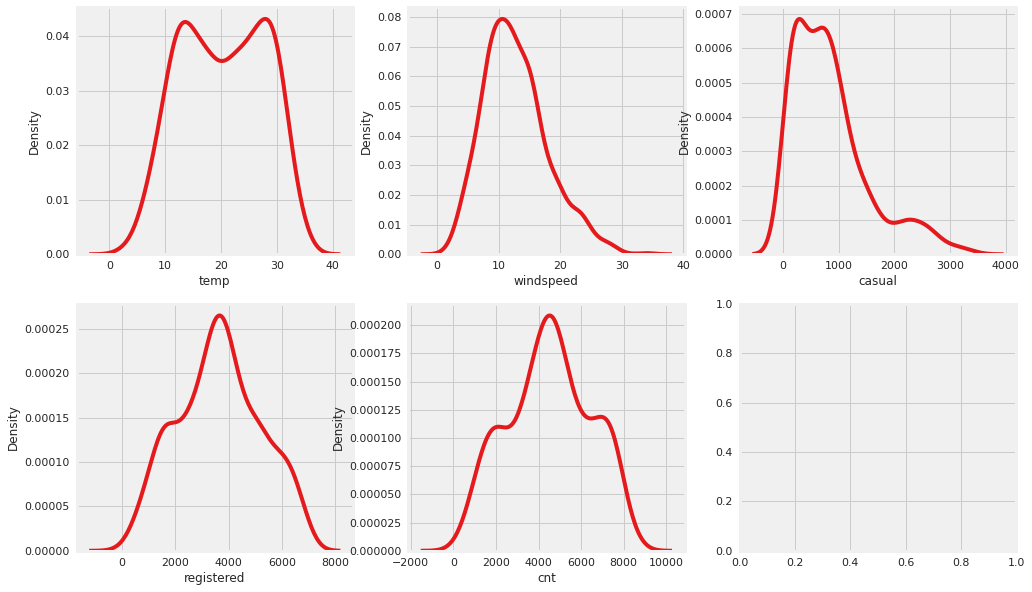

In [123]:
## Understanding the distribution of continous features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

#create chart in each subplot
sns.kdeplot(br.temp, ax=axes[0,0])

sns.kdeplot(br.windspeed, ax=axes[0,1])

sns.kdeplot(br.casual, ax=axes[0,2])

sns.kdeplot(br.registered, ax=axes[1,0])

sns.kdeplot(br.cnt, ax=axes[1,1])

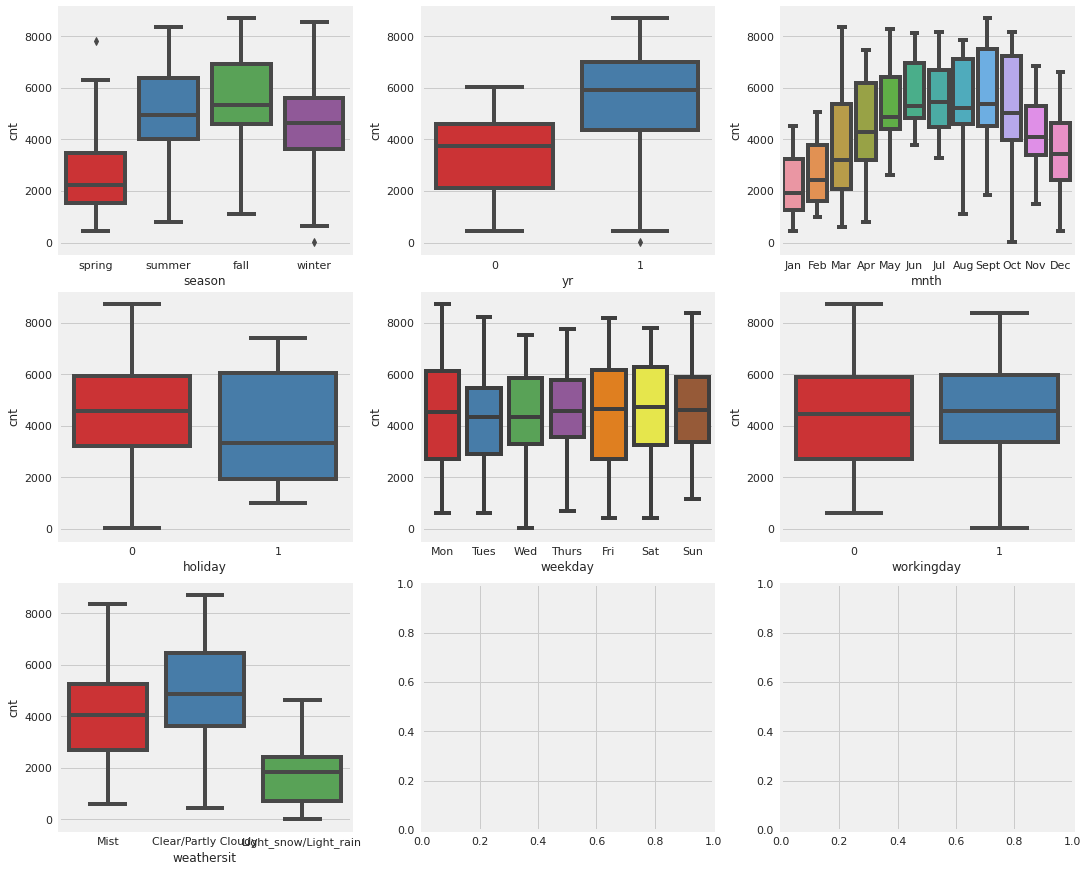

In [124]:
# understanding the categorical features
fig, axes = plt.subplots(3, 3, figsize=(15, 12), constrained_layout=True)

sns.boxplot(y=br.cnt, x=br.season, data=br, ax=axes[0,0])

sns.boxplot(y=br.cnt, x=br.yr, data=br, ax=axes[0,1])

sns.boxplot(y=br.cnt, x=br.mnth, data=br, ax=axes[0,2])

sns.boxplot(y=br.cnt, x=br.holiday, data=br, ax=axes[1,0])

sns.boxplot(y=br.cnt, x=br.weekday, data=br, ax=axes[1,1])

sns.boxplot(y=br.cnt, x=br.workingday, data=br, ax=axes[1,2])

sns.boxplot(y=br.cnt, x=br.weathersit, data=br, ax=axes[2,0])


plt.show()

In [125]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 85.7+ KB


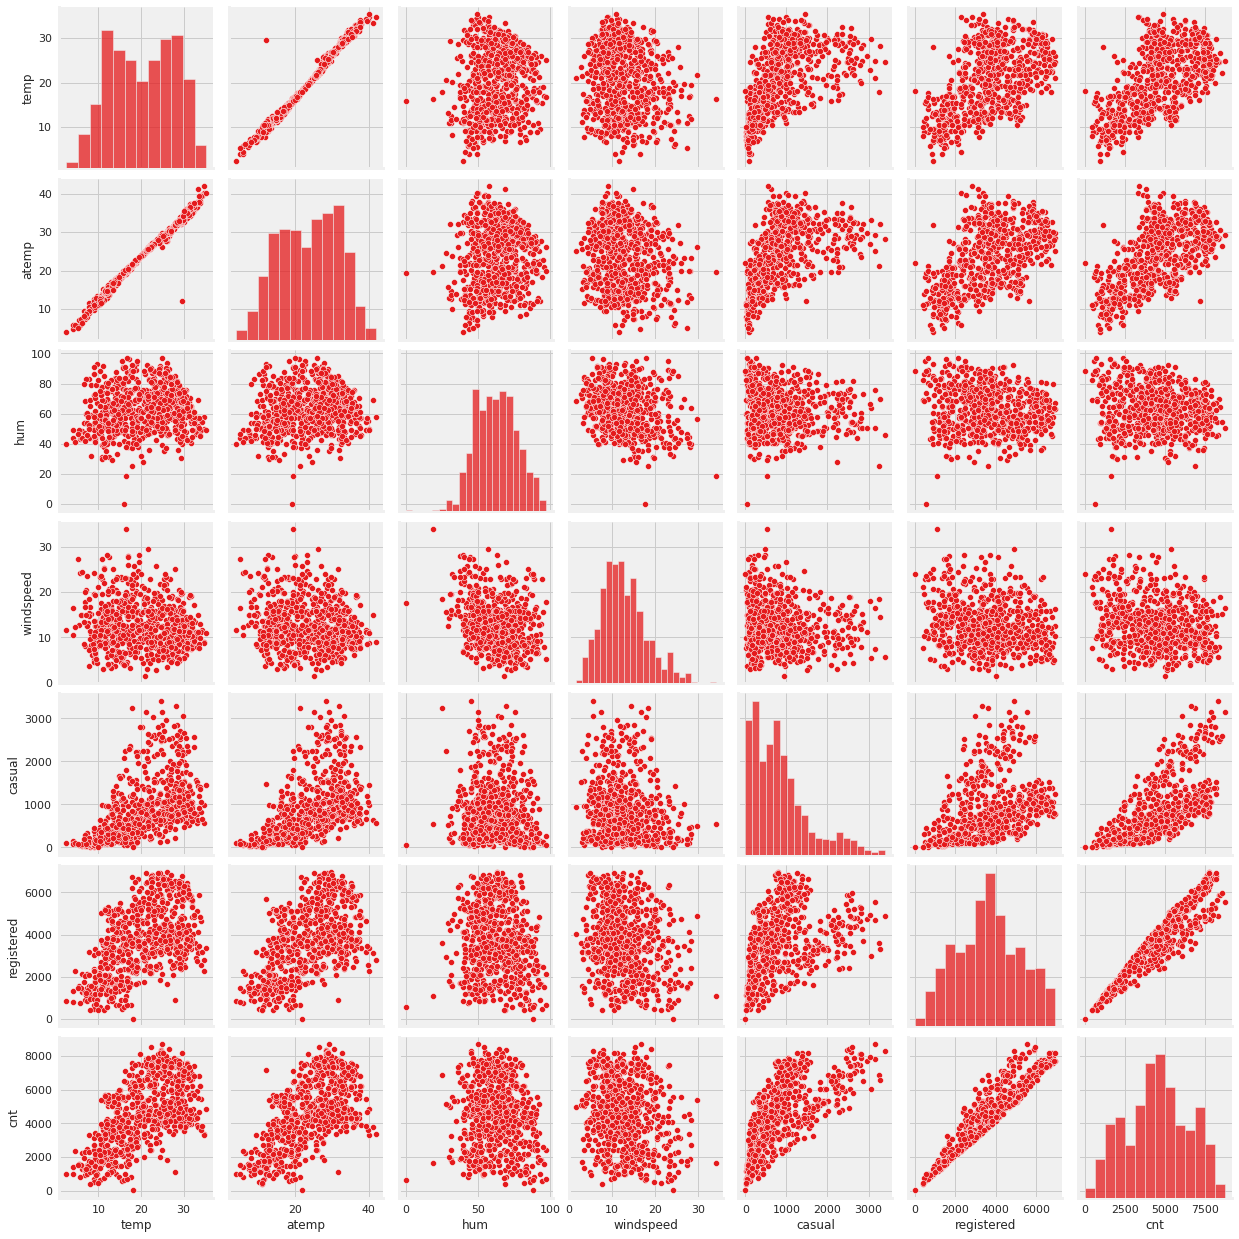

In [126]:
# pair plot for numberical variables
numberic_features=['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

sns.pairplot(br[numberic_features])
plt.show()

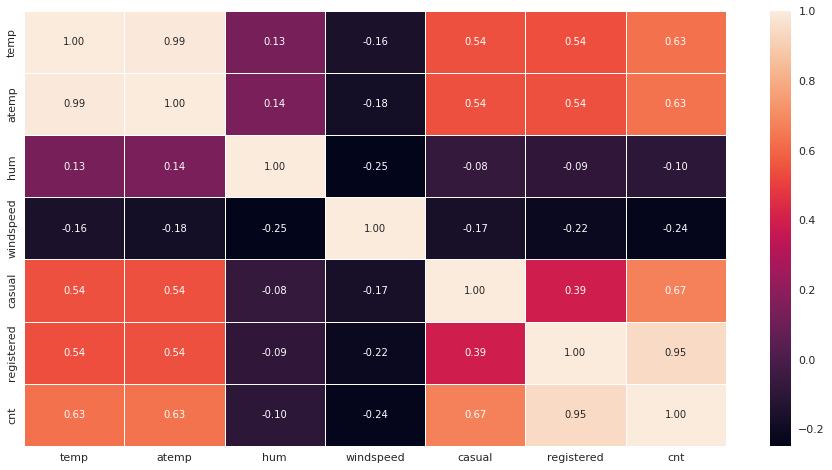

In [127]:
plt.figure(figsize=(14,8))
sns.heatmap(br[numberic_features].corr(), annot=True, linewidth=.5, fmt=".2f")
plt.show()

Following are the observations
1. 'cnt' hightly co related with registered and casual
2. temp and atemp are equally co realted with cnt
3. hum, windspeed are negitively co realted which mean the there are low riders when there is high speed wind or the temp is highly humid.

Following conclusion are drawn
1. drop atemp as its imformation is represented by temp.


In [128]:
br = br.drop(['atemp'], axis=1)
br.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

## Preparing the data for Modelling

In [129]:
br.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Tues,0,Mist,14.902598,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Thurs,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Fri,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,82,1518,1600


In [130]:
## getting rid of date column
br = br.drop('dteday', axis=1)

### Encoding the categorical variables

In [131]:
# cat variables require endocding
cat_variables=['season', 'mnth', 'weekday', 'weathersit','yr', 'workingday', 'holiday']

In [132]:
transformer = make_column_transformer(
    (OneHotEncoder(), cat_variables),
    remainder='passthrough')

transformed = transformer.fit_transform(br)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)

In [133]:
transformed_df.columns

Index(['onehotencoder__season_fall', 'onehotencoder__season_spring',
       'onehotencoder__season_summer', 'onehotencoder__season_winter',
       'onehotencoder__mnth_Apr', 'onehotencoder__mnth_Aug',
       'onehotencoder__mnth_Dec', 'onehotencoder__mnth_Feb',
       'onehotencoder__mnth_Jan', 'onehotencoder__mnth_Jul',
       'onehotencoder__mnth_Jun', 'onehotencoder__mnth_Mar',
       'onehotencoder__mnth_May', 'onehotencoder__mnth_Nov',
       'onehotencoder__mnth_Oct', 'onehotencoder__mnth_Sept',
       'onehotencoder__weekday_Fri', 'onehotencoder__weekday_Mon',
       'onehotencoder__weekday_Sat', 'onehotencoder__weekday_Sun',
       'onehotencoder__weekday_Thurs', 'onehotencoder__weekday_Tues',
       'onehotencoder__weekday_Wed',
       'onehotencoder__weathersit_Clear/Partly Cloudy',
       'onehotencoder__weathersit_Light_snow/Light_rain',
       'onehotencoder__weathersit_Mist', 'onehotencoder__yr_0',
       'onehotencoder__yr_1', 'onehotencoder__workingday_0',
       'oneho

In [134]:
transformed_df.head()

,onehotencoder__season_fall,onehotencoder__season_spring,onehotencoder__season_summer,onehotencoder__season_winter,onehotencoder__mnth_Apr,onehotencoder__mnth_Aug,onehotencoder__mnth_Dec,onehotencoder__mnth_Feb,onehotencoder__mnth_Jan,onehotencoder__mnth_Jul,...,onehotencoder__workingday_0,onehotencoder__workingday_1,onehotencoder__holiday_0,onehotencoder__holiday_1,remainder__temp,remainder__hum,remainder__windspeed,remainder__casual,remainder__registered,remainder__cnt
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


### Performing the train test split

In [135]:
# dropping target column
# Also dropping casual and registered as both adds upto cnt
X = transformed_df.drop(['remainder__cnt','remainder__casual', 'remainder__registered'], axis=1)
y = transformed_df.remainder__cnt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [136]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(730, 35)
(511, 35)
(219, 35)


### Scaling the features

As this distribution is not close to normal or gaussian distribution hence choosing min max scaler for scaling

In [137]:
numberic_variable = ['remainder__temp', 'remainder__hum',
       'remainder__windspeed']
# X_train[features]

scaler = MinMaxScaler()
X_train[numberic_variable] = scaler.fit_transform(X_train[numberic_variable])
X_train[numberic_variable].head()

,remainder__temp,remainder__hum,remainder__windspeed
683,0.327133,0.639330,0.327101
645,0.403972,0.731215,0.419004
163,0.717562,0.509660,0.708724
360,0.331287,0.785745,0.415925
640,0.745598,0.817947,0.110593


In [138]:
X_train.head()

,onehotencoder__season_fall,onehotencoder__season_spring,onehotencoder__season_summer,onehotencoder__season_winter,onehotencoder__mnth_Apr,onehotencoder__mnth_Aug,onehotencoder__mnth_Dec,onehotencoder__mnth_Feb,onehotencoder__mnth_Jan,onehotencoder__mnth_Jul,...,onehotencoder__weathersit_Mist,onehotencoder__yr_0,onehotencoder__yr_1,onehotencoder__workingday_0,onehotencoder__workingday_1,onehotencoder__holiday_0,onehotencoder__holiday_1,remainder__temp,remainder__hum,remainder__windspeed
683,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.327133,0.639330,0.327101
645,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.403972,0.731215,0.419004
163,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.717562,0.509660,0.708724
360,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.331287,0.785745,0.415925
640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.745598,0.817947,0.110593


In [139]:
X_train.columns

Index(['onehotencoder__season_fall', 'onehotencoder__season_spring',
       'onehotencoder__season_summer', 'onehotencoder__season_winter',
       'onehotencoder__mnth_Apr', 'onehotencoder__mnth_Aug',
       'onehotencoder__mnth_Dec', 'onehotencoder__mnth_Feb',
       'onehotencoder__mnth_Jan', 'onehotencoder__mnth_Jul',
       'onehotencoder__mnth_Jun', 'onehotencoder__mnth_Mar',
       'onehotencoder__mnth_May', 'onehotencoder__mnth_Nov',
       'onehotencoder__mnth_Oct', 'onehotencoder__mnth_Sept',
       'onehotencoder__weekday_Fri', 'onehotencoder__weekday_Mon',
       'onehotencoder__weekday_Sat', 'onehotencoder__weekday_Sun',
       'onehotencoder__weekday_Thurs', 'onehotencoder__weekday_Tues',
       'onehotencoder__weekday_Wed',
       'onehotencoder__weathersit_Clear/Partly Cloudy',
       'onehotencoder__weathersit_Light_snow/Light_rain',
       'onehotencoder__weathersit_Mist', 'onehotencoder__yr_0',
       'onehotencoder__yr_1', 'onehotencoder__workingday_0',
       'oneho

### Feature Reduction using stats model

In [97]:
# build the model with all variables
X_train_sm = sm.add_constant(X_train)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         remainder__cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.56
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.77e-178
Time:                        12:55:32   Log-Likelihood:                -4111.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     483   BIC:                             8398.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             874.0103    103.515      8.443      0.000     670.614    1077.406
onehotencoder__season_fall                        340.0979    152.005      2.237      0.026      41.425     638.771
onehotencoder__season_spring                     -884.5013    153.306     -5.770      0.000   -1185.730    -583.273
onehotencoder__season_summer                      442.5831    151.541      2.921      0.004     144.823     740.343
onehotencoder__season_winter                      975.8306    149.975      6.507      0.000     681.147    1270.514
onehotencoder__mnth_Apr                            18.8538    188.199      0.100      0.920    -350.937     388.644
onehotencoder__mnth_Aug                          -100.7551    207.648     -0.485      0.628    -508.759     307.249
onehotencoder__mnth_Dec                          -270.8362    177.433     -1.526      0.128    -619.472      77.800
onehotencoder__mnth_Feb                           182.5657    207.277      0.881      0.379    -224.710     589.842
onehotencoder__mnth_Jan                            48.9122    215.420      0.227      0.820    -374.364     472.189
onehotencoder__mnth_Jul                          -357.9711    212.760     -1.683      0.093    -776.020      60.078
onehotencoder__mnth_Jun                           -11.7739    185.763     -0.063      0.949    -376.777     353.230
onehotencoder__mnth_Mar                           501.0423    165.243      3.032      0.003     176.359     825.725
onehotencoder__mnth_May                           267.7102    193.739      1.382      0.168    -112.964     648.385
onehotencoder__mnth_Nov                          -379.6360    196.798     -1.929      0.054    -766.322       7.050
onehotencoder__mnth_Oct                           352.5366    186.734      1.888      0.060     -14.375     719.448
onehotencoder__mnth_Sept                          623.3617    161.272      3.865      0.000     306.481     940.242
onehotencoder__weekday_Fri                        149.6550     89.700      1.668      0.096     -26.595     325.905
onehotencoder__weekday_Mon                        304.4901     72.844      4.180      0.000     161.360     447.621
onehotencoder__weekday_Sat                        182.4021     86.001      2.121      0.034      13.420     351.384
onehotencoder__weekday_Sun                        240.0893     90.635      2.649      0.008      62.002     418.177
onehotencoder__weekday_Thurs                        1.4513     91.256      0.016      0.987    -177.858     180.760
onehotencoder__weekday_Tues                       -87.4369     73.113     -1.196      0.232    -231.095      56.222
onehotencoder__weekday_Wed                         83.3593     84.1

### VIF

In [140]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
0,onehotencoder__season_fall,inf
1,onehotencoder__season_spring,inf
31,onehotencoder__holiday_1,inf
30,onehotencoder__holiday_0,inf
29,onehotencoder__workingday_1,inf
28,onehotencoder__workingday_0,inf
27,onehotencoder__yr_1,inf
26,onehotencoder__yr_0,inf
25,onehotencoder__weathersit_Mist,inf
24,onehotencoder__weathersit_Light_snow/Light_rain,inf


In [141]:
## identifying the varibles having high p values and VIF
X = X_train.drop('onehotencoder__weekday_Thurs', axis=1)

In [142]:
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         remainder__cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.56
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.77e-178
Time:                        13:14:44   Log-Likelihood:                -4111.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     483   BIC:                             8398.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             874.4686    115.711      7.557      0.000     647.109    1101.829
onehotencoder__season_fall                        340.2125    152.593      2.230      0.026      40.384     640.041
onehotencoder__season_spring                     -884.3867    153.649     -5.756      0.000   -1186.289    -582.484
onehotencoder__season_summer                      442.6976    151.951      2.913      0.004     144.130     741.265
onehotencoder__season_winter                      975.9452    150.837      6.470      0.000     679.568    1272.323
onehotencoder__mnth_Apr                            18.8920    188.324      0.100      0.920    -351.144     388.928
onehotencoder__mnth_Aug                          -100.7169    207.906     -0.484      0.628    -509.228     307.794
onehotencoder__mnth_Dec                          -270.7980    177.307     -1.527      0.127    -619.186      77.590
onehotencoder__mnth_Feb                           182.6039    207.220      0.881      0.379    -224.560     589.768
onehotencoder__mnth_Jan                            48.9504    215.332      0.227      0.820    -374.153     472.054
onehotencoder__mnth_Jul                          -357.9329    212.914     -1.681      0.093    -776.285      60.419
onehotencoder__mnth_Jun                           -11.7357    185.961     -0.063      0.950    -377.128     353.657
onehotencoder__mnth_Mar                           501.0805    165.238      3.032      0.003     176.406     825.755
onehotencoder__mnth_May                           267.7484    193.856      1.381      0.168    -113.156     648.653
onehotencoder__mnth_Nov                          -379.5978    196.666     -1.930      0.054    -766.025       6.829
onehotencoder__mnth_Oct                           352.5748    186.702      1.888      0.060     -14.274     719.424
onehotencoder__mnth_Sept                          623.3999    161.443      3.861      0.000     306.183     940.617
onehotencoder__weekday_Fri                        148.2037    132.856      1.116      0.265    -112.843     409.251
onehotencoder__weekday_Mon                        304.0064     82.152      3.701      0.000     142.586     465.427
onehotencoder__weekday_Sat                        180.9508    132.650      1.364      0.173     -79.691     441.592
onehotencoder__weekday_Sun                        238.6381    135.936      1.756      0.080     -28.460     505.736
onehotencoder__weekday_Tues                       -87.9206     82.224     -1.069      0.285    -249.481      73.640
onehotencoder__weekday_Wed                         81.9081    134.605      0.609      0.543    -182.575     346.391
onehotencoder__weathersit_Clear/Partly Cloudy    1089.3165     83.2

In [ ]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

In [144]:
# bedroom seems to have high p value
X = X.drop(['onehotencoder__mnth_Apr', 'onehotencoder__mnth_Aug','onehotencoder__mnth_Dec','onehotencoder__mnth_Feb', \
            'onehotencoder__mnth_Jan','onehotencoder__mnth_Jul','onehotencoder__mnth_Jun','onehotencoder__mnth_May', \
            'onehotencoder__mnth_Oct','onehotencoder__weekday_Fri','onehotencoder__weekday_Sat','onehotencoder__weekday_Sun', \
            'onehotencoder__weekday_Tues','onehotencoder__weekday_Wed','onehotencoder__holiday_1'], axis=1)

# Building the model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         remainder__cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.03e-185
Time:                        13:14:56   Log-Likelihood:                -4124.8
No. Observations:                 511   AIC:                             8282.
Df Residuals:                     495   BIC:                             8349.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             978.2611    148.581      6.584      0.000     686.333    1270.189
onehotencoder__season_fall                        126.0308    114.905      1.097      0.273     -99.731     351.793
onehotencoder__season_spring                     -786.5379     98.541     -7.982      0.000    -980.148    -592.928
onehotencoder__season_summer                      541.9856     79.722      6.798      0.000     385.350     698.622
onehotencoder__season_winter                     1096.7826     84.383     12.998      0.000     930.989    1262.576
onehotencoder__mnth_Mar                           434.3240    151.948      2.858      0.004     135.782     732.866
onehotencoder__mnth_Nov                          -467.8021    152.172     -3.074      0.002    -766.785    -168.819
onehotencoder__mnth_Sept                          736.4390    133.677      5.509      0.000     473.795     999.083
onehotencoder__weekday_Mon                        410.8184    127.182      3.230      0.001     160.936     660.701
onehotencoder__weathersit_Clear/Partly Cloudy    1147.8975     82.850     13.855      0.000     985.117    1310.678
onehotencoder__weathersit_Light_snow/Light_rain  -812.9994    173.122     -4.696      0.000   -1153.144    -472.854
onehotencoder__weathersit_Mist                    643.3630     89.881      7.158      0.000     466.767     819.959
onehotencoder__yr_0                              -486.1374     84.582     -5.748      0.000    -652.322    -319.953
onehotencoder__yr_1                              1464.3985     79.949     18.317      0.000    1307.318    1621.479
onehotencoder__workingday_0                       318.0085     84.873      3.747      0.000     151.253     484.764
onehotencoder__workingday_1                       660.2526     93.803      7.039      0.000     475.952     844.554
onehotencoder__holiday_0                          350.7004    229.732      1.527      0.128    -100.669     802.070
remainder__temp                                  3868.4003    296.864     13.031      0.000    3285.132    4451.669
remainder__hum                                  -1314.3953    330.989     -3.971      0.000   -1964.712    -664.079
remainder__windspeed                             -982.6935    207.067     -4.746      0.000   -1389.532    -575.856
==============================================================================
Omnibus:                       71.262   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.952
Skew:                          -0.800   Prob(JB):                     6.71e-31
Kurtosis:                       4.992   Cond. No.                     2.34e+16
====================

In [ ]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

In [146]:
# bedroom seems to have high p value
X = X.drop(['onehotencoder__season_fall', 'onehotencoder__holiday_0'], axis=1)

# Building the model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         remainder__cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.36e-186
Time:                        13:19:06   Log-Likelihood:                -4126.0
No. Observations:                 511   AIC:                             8282.
Df Residuals:                     496   BIC:                             8346.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                            1171.3409    156.157      7.501      0.000     864.530    1478.152
onehotencoder__season_spring                     -925.3319    188.382     -4.912      0.000   -1295.457    -555.207
onehotencoder__season_summer                      412.9640    119.268      3.462      0.001     178.631     647.297
onehotencoder__season_winter                      968.5701    143.745      6.738      0.000     686.147    1250.994
onehotencoder__mnth_Mar                           446.6156    151.938      2.939      0.003     148.095     745.136
onehotencoder__mnth_Nov                          -474.8687    152.305     -3.118      0.002    -774.112    -175.625
onehotencoder__mnth_Sept                          735.9137    133.856      5.498      0.000     472.920     998.907
onehotencoder__weekday_Mon                        463.3649    122.599      3.780      0.000     222.487     704.243
onehotencoder__weathersit_Clear/Partly Cloudy    1211.5540     82.965     14.603      0.000    1048.547    1374.561
onehotencoder__weathersit_Light_snow/Light_rain  -748.5915    174.836     -4.282      0.000   -1092.102    -405.081
onehotencoder__weathersit_Mist                    708.3784     91.285      7.760      0.000     529.025     887.732
onehotencoder__yr_0                              -388.7722     87.530     -4.442      0.000    -560.748    -216.796
onehotencoder__yr_1                              1560.1131     83.933     18.588      0.000    1395.204    1725.022
onehotencoder__workingday_0                       388.3947     94.582      4.106      0.000     202.563     574.226
onehotencoder__workingday_1                       782.9462     87.382      8.960      0.000     611.262     954.630
remainder__temp                                  3864.8719    297.253     13.002      0.000    3280.842    4448.901
remainder__hum                                  -1314.5675    331.433     -3.966      0.000   -1965.752    -663.383
remainder__windspeed                             -967.4458    207.103     -4.671      0.000   -1374.353    -560.539
==============================================================================
Omnibus:                       74.268   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.220
Skew:                          -0.829   Prob(JB):                     2.92e-32
Kurtosis:                       5.018   Cond. No.                     1.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.76e-29. This might indicate that there a

In [109]:
vif = pd.DataFrame()
vif['features'] = X_train[['remainder__temp', 'remainder__hum', 'remainder__windspeed']].columns
vif['VIF'] = [variance_inflation_factor(X_train[['remainder__temp', 'remainder__hum', 'remainder__windspeed']].values, i) for i in range(X_train[['remainder__temp', 'remainder__hum', 'remainder__windspeed']].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,remainder__hum,8.40
0,remainder__temp,6.13
2,remainder__windspeed,4.18


In [147]:
X.columns

Index(['onehotencoder__season_spring', 'onehotencoder__season_summer',
       'onehotencoder__season_winter', 'onehotencoder__mnth_Mar',
       'onehotencoder__mnth_Nov', 'onehotencoder__mnth_Sept',
       'onehotencoder__weekday_Mon',
       'onehotencoder__weathersit_Clear/Partly Cloudy',
       'onehotencoder__weathersit_Light_snow/Light_rain',
       'onehotencoder__weathersit_Mist', 'onehotencoder__yr_0',
       'onehotencoder__yr_1', 'onehotencoder__workingday_0',
       'onehotencoder__workingday_1', 'remainder__temp', 'remainder__hum',
       'remainder__windspeed'],
      dtype='object')

In [148]:
# Final list of relevant features
features_final = ['onehotencoder__season_spring', 'onehotencoder__season_summer',
       'onehotencoder__season_winter', 'onehotencoder__mnth_Mar',
       'onehotencoder__mnth_Nov', 'onehotencoder__mnth_Sept',
       'onehotencoder__weekday_Mon',
       'onehotencoder__weathersit_Clear/Partly Cloudy',
       'onehotencoder__weathersit_Light_snow/Light_rain',
       'onehotencoder__weathersit_Mist', 'onehotencoder__yr_0',
       'onehotencoder__yr_1', 'onehotencoder__workingday_0',
       'onehotencoder__workingday_1', 'remainder__temp', 'remainder__hum',
       'remainder__windspeed']


### Resediual Analysis

In [149]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

683    4823.913523
645    4991.504598
163    4607.682365
360    1193.642028
640    6890.749923
          ...     
71     2154.107459
106    3379.123335
270    5296.016621
435    5098.152376
102    2725.918349
Length: 511, dtype: float64

In [150]:
X_train_sm.shape

(511, 18)

<AxesSubplot: ylabel='Density'>

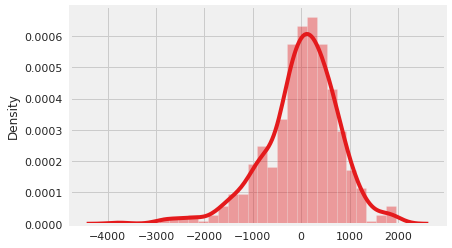

In [151]:
residual = y_train - y_train_pred
sns.distplot(residual)

## Preparing Test data

### Scaling

In [ ]:
X_test[numberic_variable]

,remainder__temp,remainder__windspeed,remainder__casual,remainder__registered
468,20.295000,12.791439,2795.0,4665.0
148,27.367500,14.333846,2355.0,2433.0
302,13.085847,11.833339,885.0,2446.0
355,17.356653,3.167425,227.0,2841.0
515,27.880000,13.083693,1100.0,6238.0
...,...,...,...,...
332,18.791653,17.292164,96.0,2818.0
532,24.292500,9.708568,2634.0,4344.0
558,29.998347,5.416950,1511.0,5988.0
137,22.550000,13.499964,536.0,3319.0


In [ ]:
X_test[numberic_variable] = scaler.transform(X_test[numberic_variable])
X_test[numberic_variable].head()

,remainder__temp,remainder__windspeed,remainder__casual,remainder__registered
468,0.543115,0.422104,0.859081,0.650689
148,0.758058,0.479765,0.723404,0.308882
302,0.324018,0.386287,0.270120,0.310873
355,0.453814,0.062325,0.067222,0.371363
515,0.773634,0.433030,0.336417,0.891577


In [ ]:
X_test.describe()

,onehotencoder__season_1,onehotencoder__season_2,onehotencoder__season_3,onehotencoder__season_4,onehotencoder__mnth_1,onehotencoder__mnth_2,onehotencoder__mnth_3,onehotencoder__mnth_4,onehotencoder__mnth_5,onehotencoder__mnth_6,...,onehotencoder__weekday_6,onehotencoder__weathersit_1,onehotencoder__weathersit_2,onehotencoder__weathersit_3,remainder__yr,remainder__holiday,remainder__temp,remainder__windspeed,remainder__casual,remainder__registered
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.283105,0.237443,0.251142,0.228311,0.077626,0.082192,0.136986,0.073059,0.068493,0.077626,...,0.127854,0.657534,0.315068,0.027397,0.452055,0.031963,0.527468,0.435511,0.252368,0.483876
std,0.451539,0.426491,0.434663,0.420705,0.268194,0.275286,0.344621,0.260830,0.253169,0.268194,...,0.334692,0.475622,0.465607,0.163612,0.498836,0.176306,0.229936,0.212750,0.221615,0.233964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047675,0.060760,-0.002158,-0.060643
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324018,0.281156,0.075393,0.302680
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.507811,0.416900,0.205674,0.470444
75%,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.726388,0.534288,0.341813,0.658423
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970925,1.214955,1.048720,0.995559


In [ ]:
X_test.columns

Index(['onehotencoder__season_1', 'onehotencoder__season_2',
       'onehotencoder__season_3', 'onehotencoder__season_4',
       'onehotencoder__mnth_1', 'onehotencoder__mnth_2',
       'onehotencoder__mnth_3', 'onehotencoder__mnth_4',
       'onehotencoder__mnth_5', 'onehotencoder__mnth_6',
       'onehotencoder__mnth_7', 'onehotencoder__mnth_8',
       'onehotencoder__mnth_9', 'onehotencoder__mnth_10',
       'onehotencoder__mnth_11', 'onehotencoder__mnth_12',
       'onehotencoder__weekday_0', 'onehotencoder__weekday_1',
       'onehotencoder__weekday_2', 'onehotencoder__weekday_3',
       'onehotencoder__weekday_4', 'onehotencoder__weekday_5',
       'onehotencoder__weekday_6', 'onehotencoder__weathersit_1',
       'onehotencoder__weathersit_2', 'onehotencoder__weathersit_3',
       'remainder__yr', 'remainder__holiday', 'remainder__temp',
       'remainder__windspeed', 'remainder__casual', 'remainder__registered'],
      dtype='object')

In [ ]:
features_final = ['onehotencoder__season_1', 'onehotencoder__season_2', 'onehotencoder__season_3', 'onehotencoder__season_4','onehotencoder__weathersit_3','onehotencoder__weathersit_2','onehotencoder__weathersit_1',\
    'onehotencoder__weekday_6','onehotencoder__weekday_5','onehotencoder__weekday_4','onehotencoder__weekday_3','onehotencoder__weekday_2','onehotencoder__weekday_1',\
        'onehotencoder__weekday_0','onehotencoder__mnth_12','onehotencoder__mnth_11','onehotencoder__mnth_10','onehotencoder__mnth_9','onehotencoder__mnth_8',
            'onehotencoder__mnth_7','onehotencoder__mnth_6','onehotencoder__mnth_5','onehotencoder__mnth_4','onehotencoder__mnth_3','onehotencoder__mnth_2',\
                'onehotencoder__mnth_1','remainder__casual','remainder__registered']

In [ ]:
X_test[features_final]

,onehotencoder__season_1,onehotencoder__season_2,onehotencoder__season_3,onehotencoder__season_4,onehotencoder__weathersit_3,onehotencoder__weathersit_2,onehotencoder__weathersit_1,onehotencoder__weekday_6,onehotencoder__weekday_5,onehotencoder__weekday_4,...,onehotencoder__mnth_8,onehotencoder__mnth_7,onehotencoder__mnth_6,onehotencoder__mnth_5,onehotencoder__mnth_4,onehotencoder__mnth_3,onehotencoder__mnth_2,onehotencoder__mnth_1,remainder__casual,remainder__registered
468,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.859081,0.650689
148,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.723404,0.308882
302,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270120,0.310873
355,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067222,0.371363
515,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.336417,0.891577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026827,0.367841
532,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.809436,0.601531
558,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.463151,0.853292
137,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.162504,0.444564


In [ ]:
# add a constanst 
X_test_sm = sm.add_constant(X_test[features_final])

X_test_sm.head()

,const,onehotencoder__season_1,onehotencoder__season_2,onehotencoder__season_3,onehotencoder__season_4,onehotencoder__weathersit_3,onehotencoder__weathersit_2,onehotencoder__weathersit_1,onehotencoder__weekday_6,onehotencoder__weekday_5,...,onehotencoder__mnth_8,onehotencoder__mnth_7,onehotencoder__mnth_6,onehotencoder__mnth_5,onehotencoder__mnth_4,onehotencoder__mnth_3,onehotencoder__mnth_2,onehotencoder__mnth_1,remainder__casual,remainder__registered
468,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.859081,0.650689
148,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.723404,0.308882
302,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270120,0.310873
355,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067222,0.371363
515,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.336417,0.891577


In [ ]:
X_test_sm.shape

(219, 29)

In [ ]:
X_train_sm.columns

Index(['const', 'onehotencoder__season_1', 'onehotencoder__season_2',
       'onehotencoder__season_3', 'onehotencoder__season_4',
       'onehotencoder__mnth_1', 'onehotencoder__mnth_2',
       'onehotencoder__mnth_3', 'onehotencoder__mnth_4',
       'onehotencoder__mnth_5', 'onehotencoder__mnth_6',
       'onehotencoder__mnth_7', 'onehotencoder__mnth_8',
       'onehotencoder__mnth_9', 'onehotencoder__mnth_10',
       'onehotencoder__mnth_11', 'onehotencoder__mnth_12',
       'onehotencoder__weekday_0', 'onehotencoder__weekday_1',
       'onehotencoder__weekday_2', 'onehotencoder__weekday_3',
       'onehotencoder__weekday_4', 'onehotencoder__weekday_5',
       'onehotencoder__weekday_6', 'onehotencoder__weathersit_1',
       'onehotencoder__weathersit_2', 'onehotencoder__weathersit_3',
       'remainder__casual', 'remainder__registered'],
      dtype='object')

In [ ]:
X_test_sm.columns

Index(['const', 'onehotencoder__season_1', 'onehotencoder__season_2',
       'onehotencoder__season_3', 'onehotencoder__season_4',
       'onehotencoder__weathersit_3', 'onehotencoder__weathersit_2',
       'onehotencoder__weathersit_1', 'onehotencoder__weekday_6',
       'onehotencoder__weekday_5', 'onehotencoder__weekday_4',
       'onehotencoder__weekday_3', 'onehotencoder__weekday_2',
       'onehotencoder__weekday_1', 'onehotencoder__weekday_0',
       'onehotencoder__mnth_12', 'onehotencoder__mnth_11',
       'onehotencoder__mnth_10', 'onehotencoder__mnth_9',
       'onehotencoder__mnth_8', 'onehotencoder__mnth_7',
       'onehotencoder__mnth_6', 'onehotencoder__mnth_5',
       'onehotencoder__mnth_4', 'onehotencoder__mnth_3',
       'onehotencoder__mnth_2', 'onehotencoder__mnth_1', 'remainder__casual',
       'remainder__registered'],
      dtype='object')

In [ ]:
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

468    7401.282895
148    4729.282895
302    3272.282895
355    2995.302632
515    7279.282895
          ...     
332    2841.302632
532    6919.282895
558    7440.282895
137    3796.282895
314    3295.302632
Length: 219, dtype: float64

In [ ]:
#evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.9992473334962441